In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import openpyxl
from IPython.core.display import display, HTML
pd.set_option('display.max_rows', 10)

/var/folders/s6/xgx8wq8n63q742dx4hm1b4l00000gn/T/ipykernel_9444/2918467818.py:10: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


In [1]:
fomc_data = pd.read_excel('text_scores.xlsx', sheet_name='fomc')
boe_data = pd.read_excel('text_scores.xlsx', sheet_name='boe')
ecb_data = pd.read_excel('text_scores.xlsx', sheet_name='ecb')
fomc_min_data = pd.read_excel('text_scores.xlsx', sheet_name='fomcmin')
boe_min_data = pd.read_excel('text_scores.xlsx', sheet_name='boemin')
ecb_min_data = pd.read_excel('text_scores.xlsx', sheet_name='ecbmin')

NameError: name 'pd' is not defined

In [ ]:
print(len(fomc_data))
print(len(fomc_min_data))
print(len(boe_data))
print(len(boe_min_data))
print(len(ecb_data))
print(len(ecb_min_data))

191
191
80
255
242
82


In [ ]:
fomc_cci = pd.read_excel('CCI/CCI_scores.xlsx', sheet_name='fomc')
boe_cci = pd.read_excel('CCI/CCI_scores.xlsx', sheet_name='boe')
ecb_cci = pd.read_excel('CCI/CCI_scores.xlsx', sheet_name='ecb')
fomc_min_cci = pd.read_excel('CCI/CCI_scores.xlsx', sheet_name='fomcmin')
boe_min_cci = pd.read_excel('CCI/CCI_scores.xlsx', sheet_name='boemin')
ecb_min_cci = pd.read_excel('CCI/CCI_scores.xlsx', sheet_name='ecbmin')

In [ ]:
fomc = pd.merge(fomc_data, fomc_cci, on='Date', how='inner')
boe = pd.merge(boe_data, boe_cci, on='Date', how='inner')
ecb = pd.merge(ecb_data, ecb_cci, on='Date', how='inner')
fomc_min = pd.merge(fomc_min_data, fomc_min_cci, on='Date', how='inner')
boe_min = pd.merge(boe_min_data, boe_min_cci, on='Date', how='inner')
ecb_min = pd.merge(ecb_min_data, ecb_min_cci, on='Date', how='inner')


In [ ]:
cov_boe = boe[["fk_score", "dc_score", "PoJ", "CCI"]].corr()
cov_boe

,fk_score,dc_score,PoJ,CCI
fk_score,1.000000,0.391425,-0.145044,-0.112266
dc_score,0.391425,1.000000,-0.087750,0.010154
PoJ,-0.145044,-0.087750,1.000000,0.948692
CCI,-0.112266,0.010154,0.948692,1.000000


In [ ]:
cov_fomc = fomc[["fk_score", "dc_score", "PoJ", "CCI"]].corr()
cov_fomc

,fk_score,dc_score,PoJ,CCI
fk_score,1.000000,0.236836,-0.016273,0.009741
dc_score,0.236836,1.000000,-0.017946,-0.001285
PoJ,-0.016273,-0.017946,1.000000,0.970372
CCI,0.009741,-0.001285,0.970372,1.000000


In [ ]:
cov_ecb = ecb[["fk_score", "dc_score", "PoJ", "CCI"]].corr()
cov_ecb

,fk_score,dc_score,PoJ,CCI
fk_score,1.000000,0.501933,-0.024374,-0.016335
dc_score,0.501933,1.000000,0.144187,0.155752
PoJ,-0.024374,0.144187,1.000000,0.970546
CCI,-0.016335,0.155752,0.970546,1.000000


In [ ]:
fomc['Date'] = pd.to_datetime(fomc['Date'])
boe['Date'] = pd.to_datetime(boe['Date'])
ecb['Date'] = pd.to_datetime(ecb['Date'])

In [ ]:
def countries_plot(metric, title, ylabel):
    plt.figure(figsize=(10, 6)) 
    plt.plot(fomc['Date'], fomc[metric], label='FOMC')
    plt.plot(boe['Date'], boe[metric], label='BoE')
    plt.plot(ecb['Date'], ecb[metric], label='ECB')

    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def minutes_plot(metric, title, ylabel):
    plt.figure(figsize=(10, 6)) 
    plt.plot(fomc_min['Date'], fomc_min[metric], label='FOMC')
    plt.plot(boe_min['Date'], boe_min[metric], label='BoE')
    plt.plot(ecb_min['Date'], ecb_min[metric], label='ECB')

    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

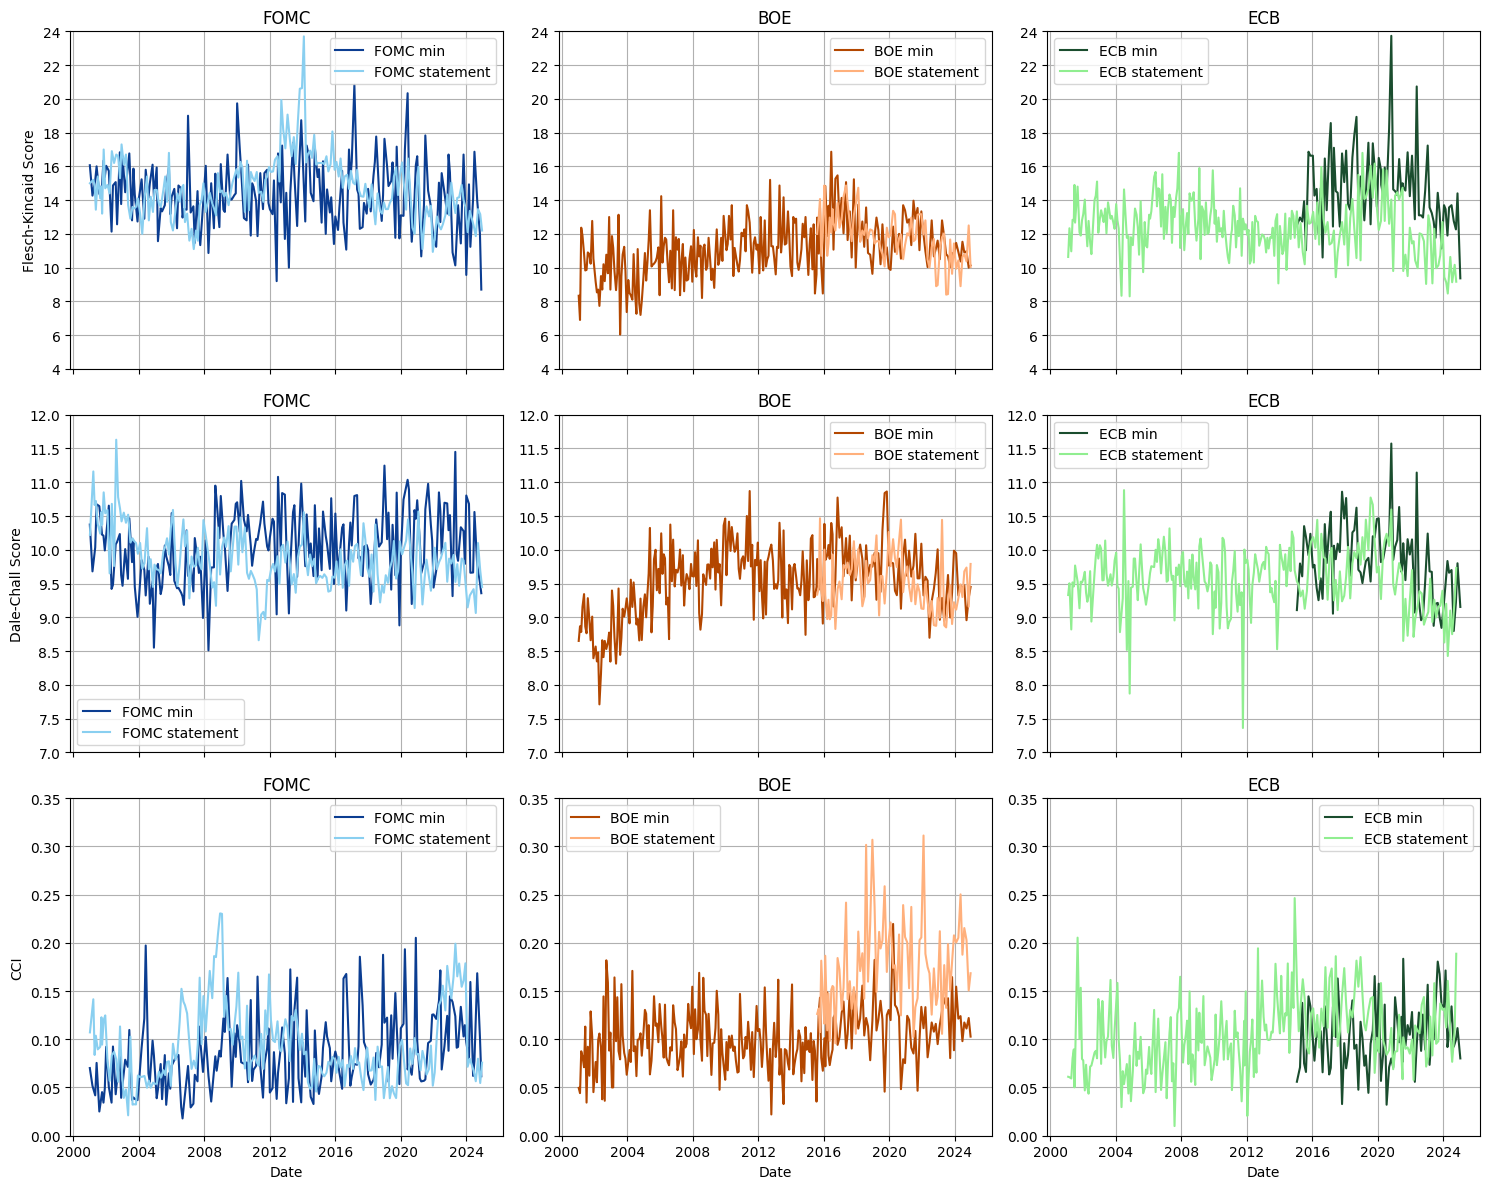

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12), sharex=True)

# Define categories for each row
y_vars = ['fk_score', 'dc_score', 'CCI']
titles = ['Flesch-Kincaid Score', 'Dale-Chall Score', 'CCI']
institutions = [('fomc', 'FOMC'), ('boe', 'BOE'), ('ecb', 'ECB')]

# Define custom colors for each institution
colors = {
    'fomc': {'min': '#0b3d91', 'statement': '#89cff0'},  # Dark blue & light blue
    'boe': {'min': '#b34700', 'statement': '#ffb07c'},  # Dark orange & light orange
    'ecb': {'min': '#1a4d2e', 'statement': '#90ee90'}   # Dark green & light green
}

# Define y-axis limits and tick intervals
y_axis_settings = {
    'fk_score': {'ylim': (5.5, 24), 'yticks': np.arange(4, 26, 2)},
    'dc_score': {'ylim': (7, 12), 'yticks': np.arange(7, 12.5, 0.5)},
    'CCI': {'ylim': (0, 0.35), 'yticks': np.arange(0, 0.4, 0.05)}
}

# Loop through each row (y-axis variable) and each column (institution)
for row, y_var in enumerate(y_vars):
    for col, (df_prefix, institution) in enumerate(institutions):
        ax = axes[row, col]
        
        df = globals()[df_prefix]  
        df_min = globals()[f"{df_prefix}_min"]  
        
        # Plot data with institution-specific colors
        ax.plot(df_min['Date'], df_min[y_var], label=f"{institution} min", color=colors[df_prefix]['min'])
        ax.plot(df['Date'], df[y_var], label=f"{institution} statement", color=colors[df_prefix]['statement'])
        
        ax.set_ylim(y_axis_settings[y_var]['ylim'])
        ax.set_yticks(y_axis_settings[y_var]['yticks'])
        
        # Labels and title
        if col == 0:
            ax.set_ylabel(titles[row])
        if row == 2:
            ax.set_xlabel('Date')
        
        ax.set_title(institution)
        ax.legend()
        ax.grid(True)

plt.tight_layout()
plt.show()


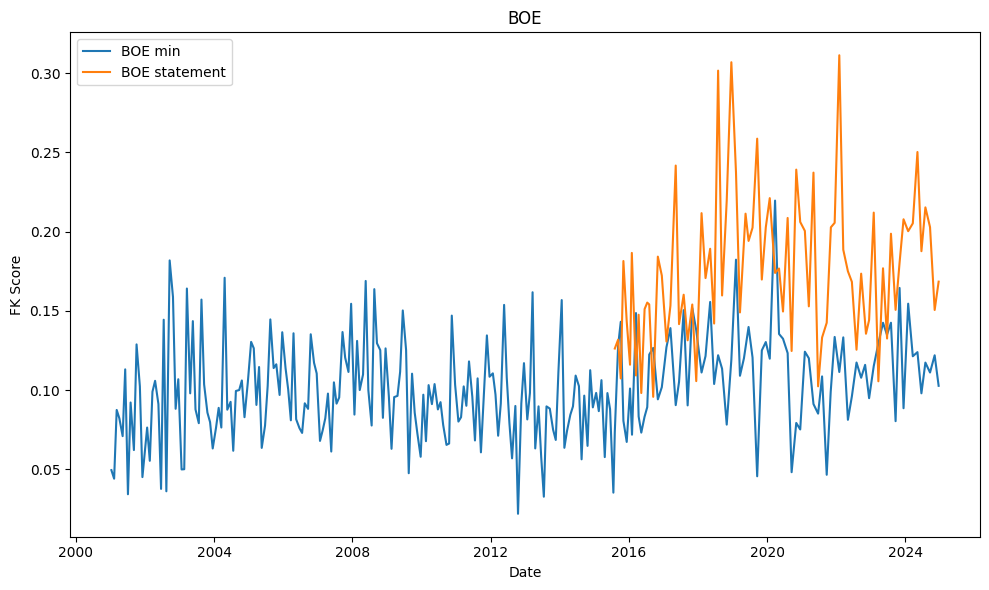

In [ ]:
plt.figure(figsize=(10, 6)) 
plt.plot(boe_min['Date'], boe_min['CCI'], label='BOE min')
plt.plot(boe['Date'], boe['CCI'], label='BOE statement')

plt.xlabel('Date')
plt.ylabel('FK Score')
plt.title('BOE')
plt.legend()
plt.tight_layout()
plt.show()

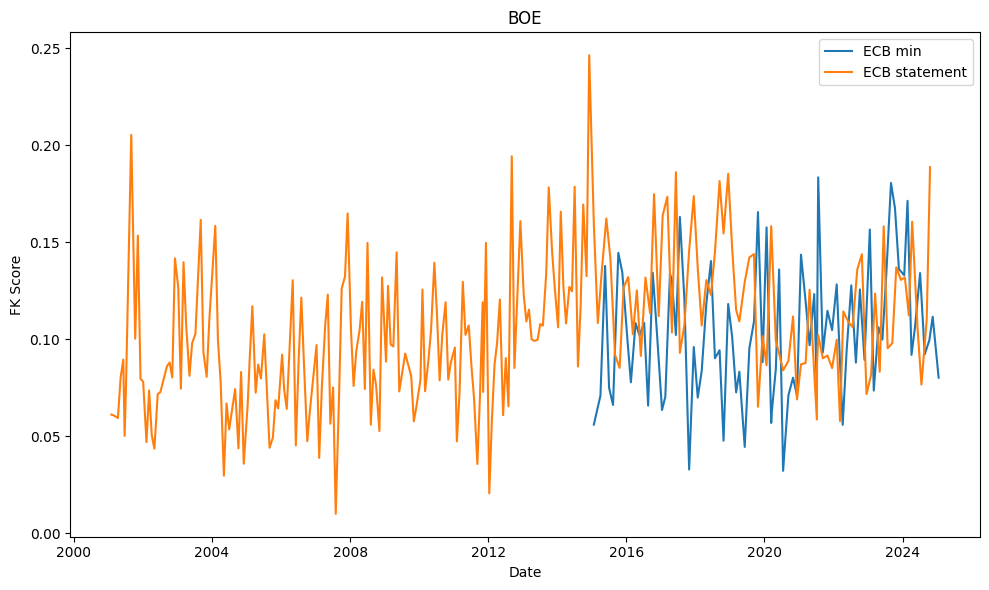

In [ ]:
plt.figure(figsize=(10, 6)) 
plt.plot(ecb_min['Date'], ecb_min['CCI'], label='ECB min')
plt.plot(ecb['Date'], ecb['CCI'], label='ECB statement')

plt.xlabel('Date')
plt.ylabel('FK Score')
plt.title('BOE')
plt.legend()
plt.tight_layout()
plt.show()

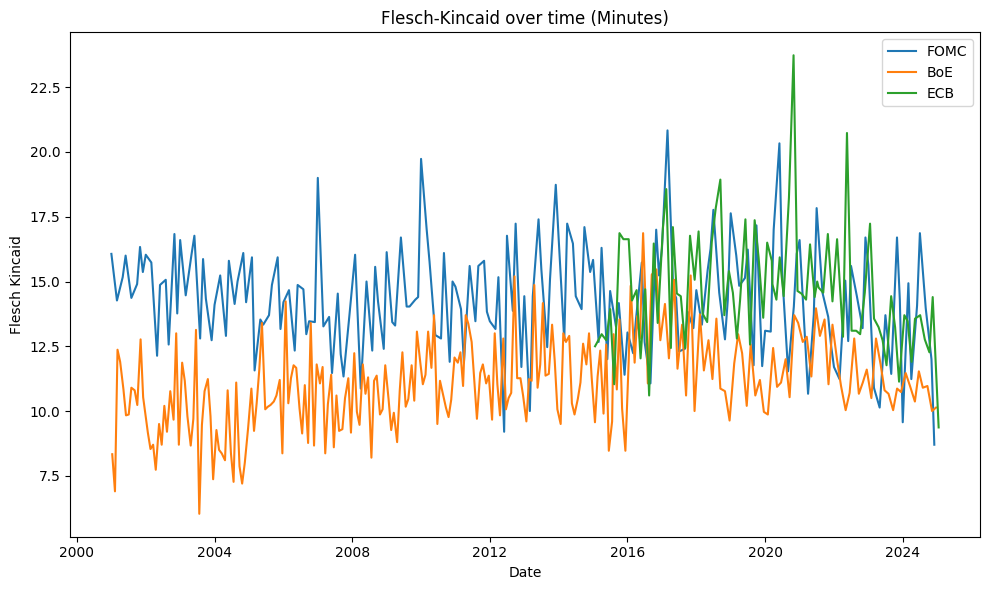

In [ ]:
minutes_plot('fk_score', 'Flesch-Kincaid over time (Minutes)', 'Flesch Kincaid')

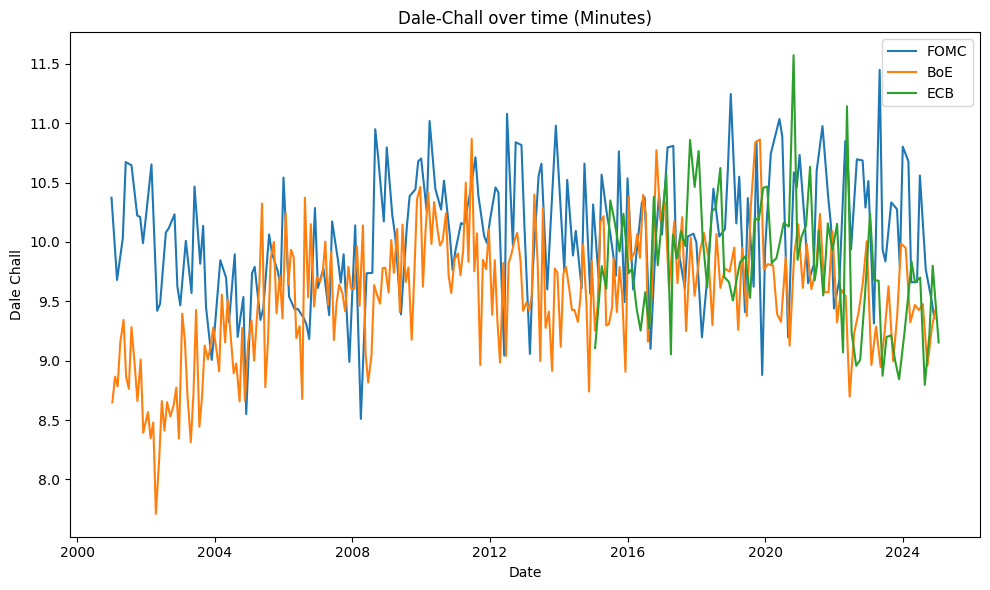

In [ ]:
minutes_plot('dc_score', 'Dale-Chall over time (Minutes)', 'Dale Chall')

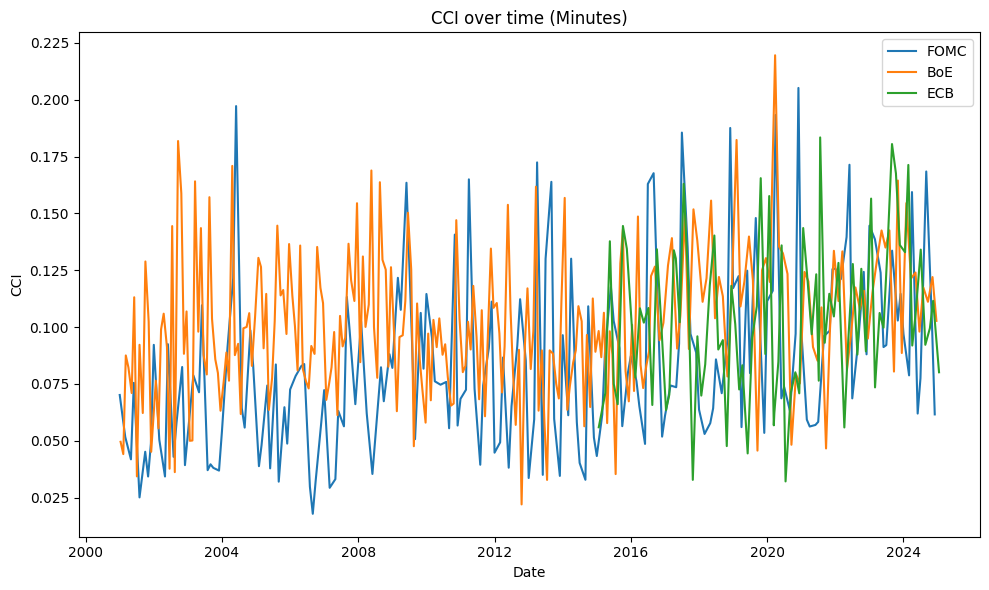

In [ ]:
minutes_plot('CCI', 'CCI over time (Minutes)', 'CCI')

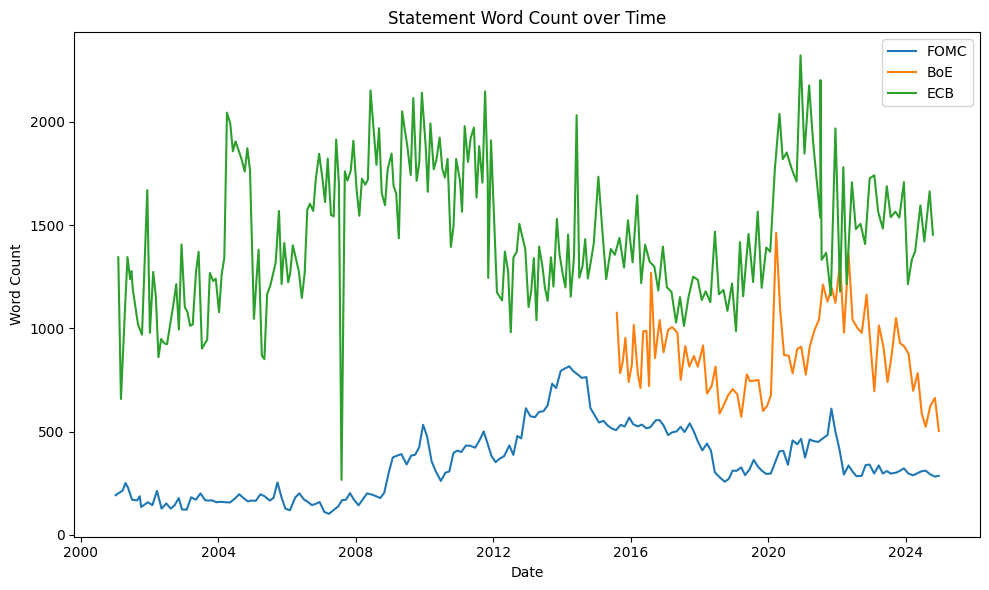

In [ ]:
countries_plot('wc', 'Statement Word Count over Time', 'Word Count')
# Note: August 2 2007 meeting was abnormally short (unclear why)

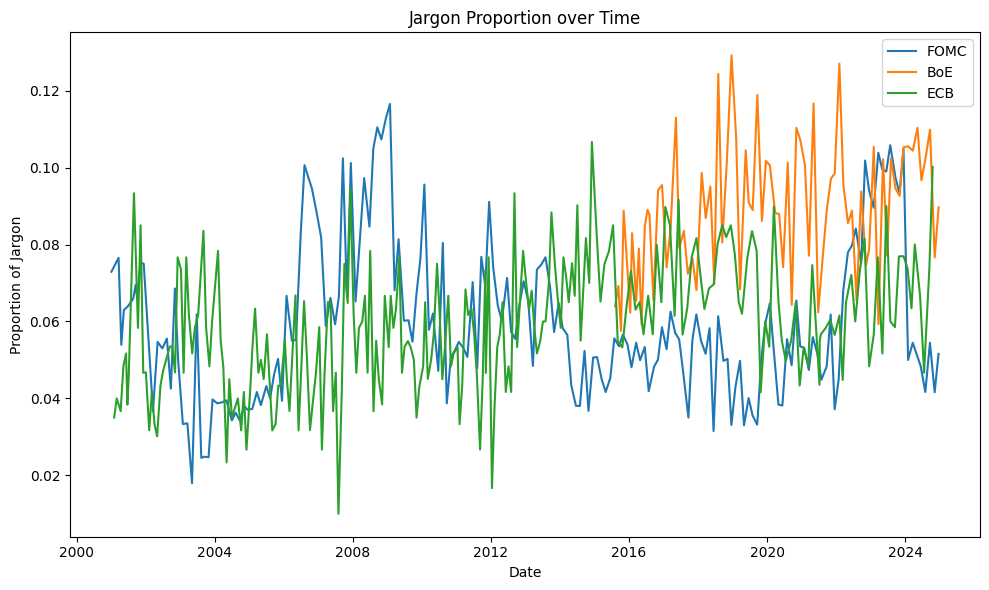

In [ ]:
countries_plot('PoJ', 'Jargon Proportion over Time', 'Proportion of Jargon')

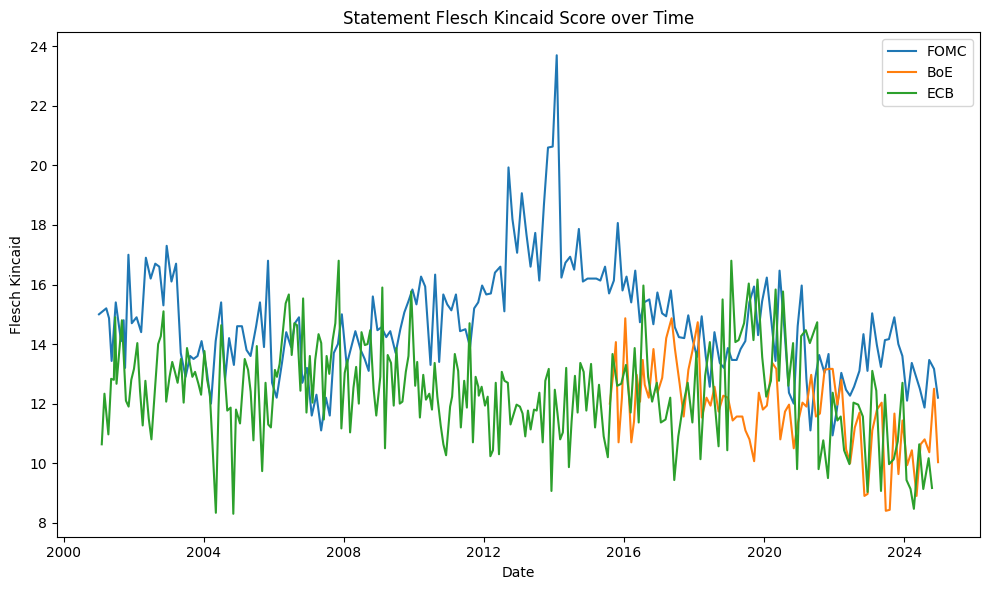

In [ ]:
countries_plot('fk_score', 'Statement Flesch Kincaid Score over Time', 'Flesch Kincaid')

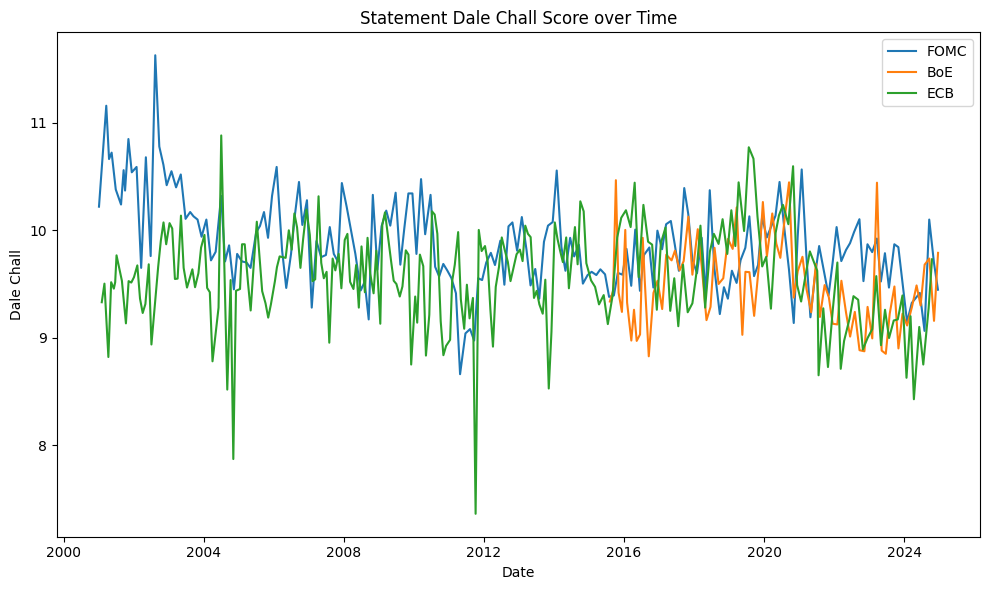

In [ ]:
countries_plot('dc_score', 'Statement Dale Chall Score over Time', 'Dale Chall')

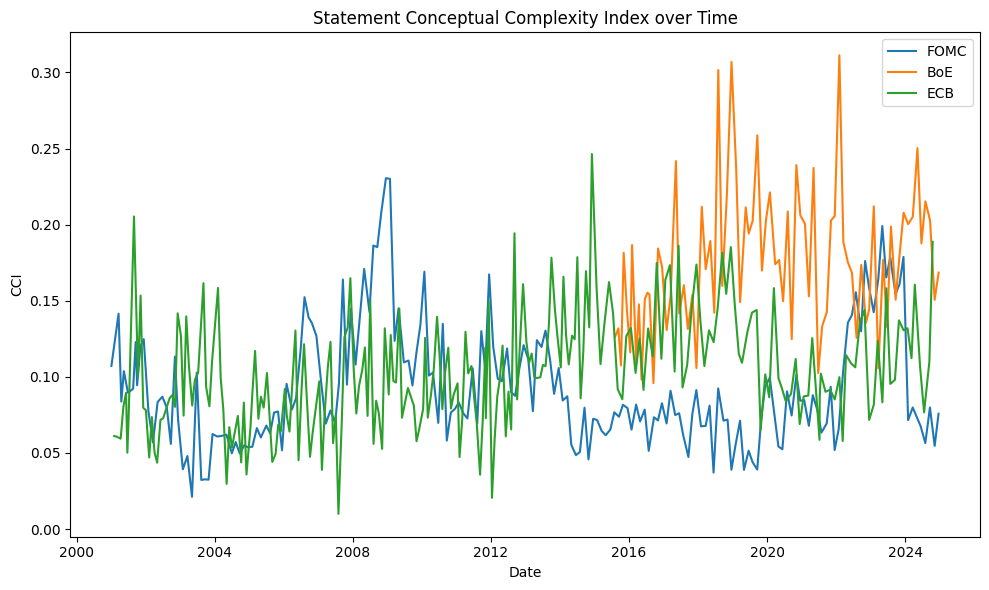

In [ ]:
countries_plot('CCI', 'Statement Conceptual Complexity Index over Time', 'CCI')

In [ ]:
def normalize_data(data):
    mean = data.mean()
    std = data.std()
    return (data - mean) / std

In [ ]:
fomc_normalized = pd.DataFrame()
boe_normalized = pd.DataFrame()
ecb_normalized = pd.DataFrame()

fomc_normalized['Date'] = fomc['Date']
boe_normalized['Date'] = boe['Date']
ecb_normalized['Date'] = ecb['Date']

for column in ["fk_score", "dc_score", "CCI"]: # Loop through the columns you want to normalize
    fomc_normalized[column] = normalize_data(fomc[column])
    boe_normalized[column] = normalize_data(boe[column])
    ecb_normalized[column] = normalize_data(ecb[column])


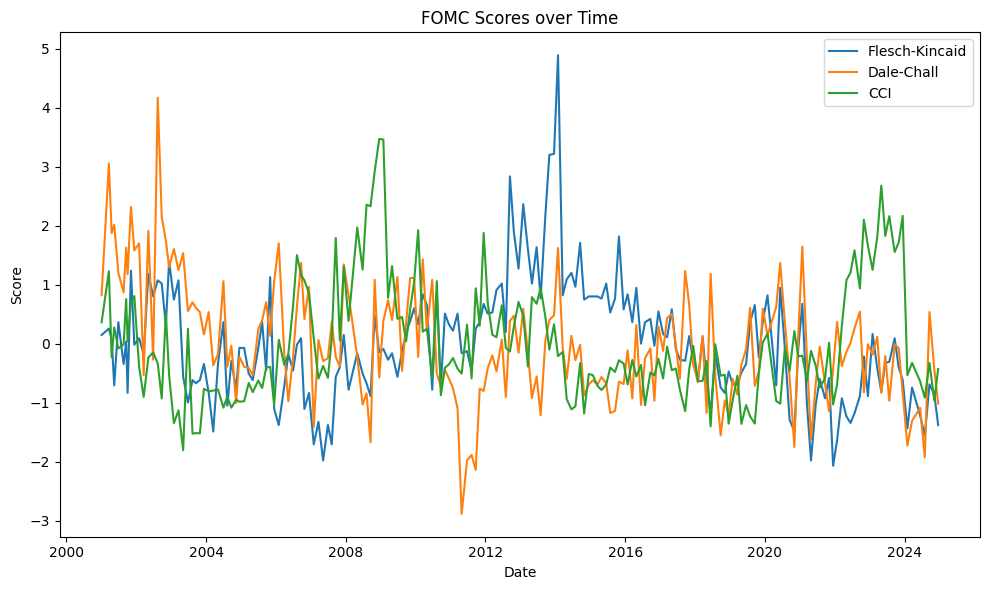

In [ ]:
plt.figure(figsize=(10, 6)) 
plt.plot(fomc_normalized['Date'], fomc_normalized['fk_score'], label='Flesch-Kincaid')
plt.plot(fomc_normalized['Date'], fomc_normalized['dc_score'], label='Dale-Chall')
plt.plot(fomc_normalized['Date'], fomc_normalized['CCI'], label='CCI')

plt.xlabel('Date')
plt.ylabel('Score')
plt.title('FOMC Scores over Time')
plt.legend()
plt.tight_layout()
plt.show()

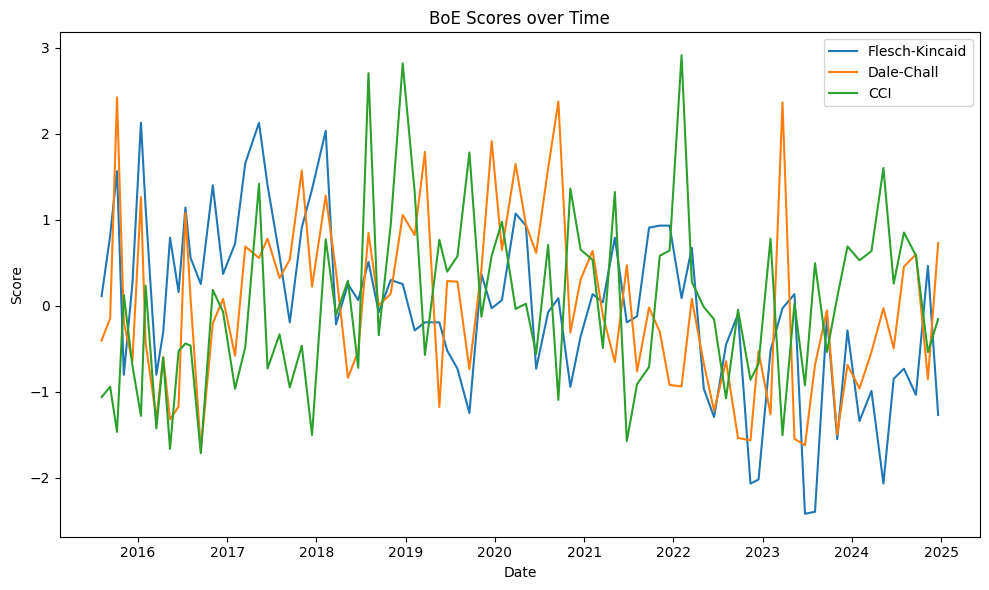

In [ ]:
plt.figure(figsize=(10, 6)) 
plt.plot(boe_normalized['Date'], boe_normalized['fk_score'], label='Flesch-Kincaid')
plt.plot(boe_normalized['Date'], boe_normalized['dc_score'], label='Dale-Chall')
plt.plot(boe_normalized['Date'], boe_normalized['CCI'], label='CCI')

plt.xlabel('Date')
plt.ylabel('Score')
plt.title('BoE Scores over Time')
plt.legend()
plt.tight_layout()
plt.show()

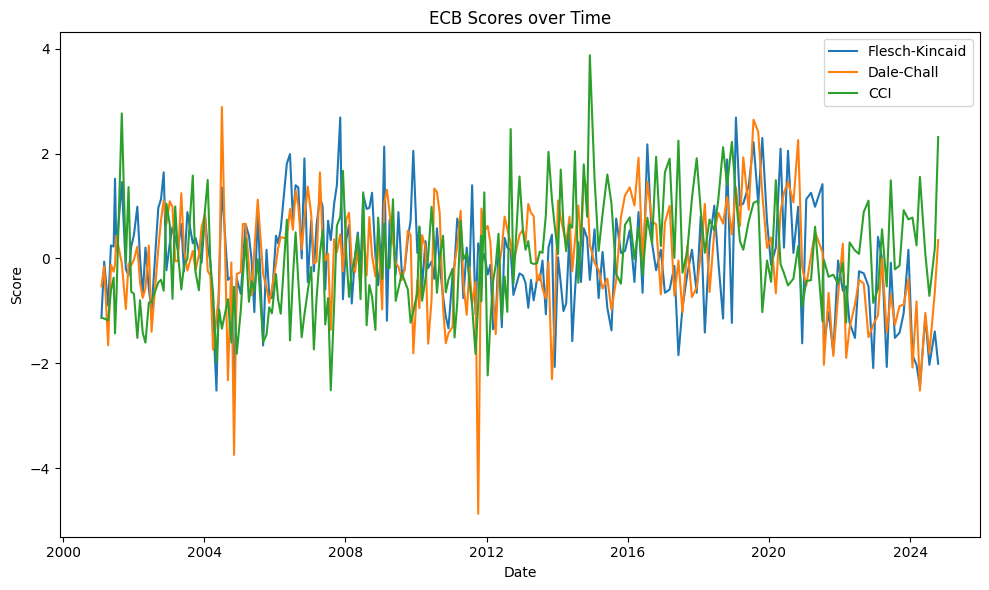

In [ ]:
plt.figure(figsize=(10, 6)) 
plt.plot(ecb_normalized['Date'], ecb_normalized['fk_score'], label='Flesch-Kincaid')
plt.plot(ecb_normalized['Date'], ecb_normalized['dc_score'], label='Dale-Chall')
plt.plot(ecb_normalized['Date'], ecb_normalized['CCI'], label='CCI')

plt.xlabel('Date')
plt.ylabel('Score')
plt.title('ECB Scores over Time')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
fomc_factors = pd.read_excel('factors.xlsx', sheet_name='fomc')
ecb_factors = pd.read_excel('factors.xlsx', sheet_name='ecb')
boe_factors = pd.read_excel('factors.xlsx', sheet_name='boe')

In [ ]:
fomc_factors

,Date,Q1,Q2,Y1,Y2,Y5,Y10,Target,Path,QE
0,1991-01-08,-0.12500,-0.1100,-0.0800,-0.024492,-0.053286,-0.058557,-0.110869,-0.081721,0.007980
1,1991-02-01,-0.04000,-0.0550,-0.0450,-0.016261,0.003629,0.006617,-0.031327,-0.013994,-0.020626
2,1991-02-01,-0.06000,-0.0300,-0.0300,-0.004875,-0.021771,-0.008824,-0.038000,-0.016241,-0.000985
3,1991-02-07,0.01000,-0.0050,-0.0100,-0.003248,0.000000,0.002192,0.020089,0.006846,-0.002580
4,1991-03-08,-0.06500,-0.0850,-0.0500,0.019617,-0.027666,-0.029307,-0.059889,-0.033035,0.000339
...,...,...,...,...,...,...,...,...,...,...
291,2023-06-14,0.00250,0.0750,0.1450,0.115748,0.091064,0.054933,0.020335,0.163058,0.006125
292,2023-07-26,-0.00250,0.0050,0.0075,0.004019,0.000000,0.000000,0.011788,0.015831,0.004307
293,2023-09-20,0.03250,0.0625,0.1075,0.071429,0.057770,0.036750,0.044047,0.115062,0.008971
294,2023-11-01,-0.01500,-0.0150,-0.0125,-0.015098,-0.014365,-0.008503,-0.002114,-0.008679,0.003169


In [ ]:
def plot_factor_coefficients(df, terms, factors):

    # Lists to store regression coefficients and confidence intervals
    coef_data = {var: {'coefs': [], 'lower_cis': [], 'upper_cis': []} for var in factors}

    # Run the regressions and get confidence intervals
    for term in terms:
        X = df[factors]
        X = sm.add_constant(X)
        y = df[term]
        model = sm.OLS(y, X).fit()

        for var in factors:
            coef_data[var]['coefs'].append(model.params[var])
            ci = model.conf_int().loc[var]
            coef_data[var]['lower_cis'].append(ci[0])
            coef_data[var]['upper_cis'].append(ci[1])
    
    # Create the plots
    x_axis = terms
    num_plots = len(factors)
    fig, axes = plt.subplots(1, num_plots, figsize=(15, 5))  # Adjust figsize as needed
    if num_plots == 1:
        axes = [axes]
    
    colors = {factors[0]: 'blue', factors[1]: 'green', factors[2]: 'red'} # Create color mapping

    for i, var in enumerate(factors):
      ax = axes[i]
      ax.plot(x_axis, coef_data[var]['coefs'], marker='o', linestyle='-', label=f'{var} Coefficient', color=colors.get(var, 'black')) # Set correct colors
      ax.fill_between(x_axis, coef_data[var]['lower_cis'], coef_data[var]['upper_cis'], color='gray', alpha=0.1, label = '90% Confidence Interval')
      ax.set_xlabel('Yield')
      ax.set_ylabel('Regression Coefficient')
      ax.set_title(var) # Set correct title
      ax.legend()
      ax.grid(True)
    plt.tight_layout() # Adjusts spacing for the plots to fit better
    plt.show()

In [ ]:
fomc_factors

,Date,Q1,Q2,Y1,Y2,Y5,Y10,Target,Path,QE
0,1991-01-08,-0.12500,-0.1100,-0.0800,-0.024492,-0.053286,-0.058557,-0.110869,-0.081721,0.007980
1,1991-02-01,-0.04000,-0.0550,-0.0450,-0.016261,0.003629,0.006617,-0.031327,-0.013994,-0.020626
2,1991-02-01,-0.06000,-0.0300,-0.0300,-0.004875,-0.021771,-0.008824,-0.038000,-0.016241,-0.000985
3,1991-02-07,0.01000,-0.0050,-0.0100,-0.003248,0.000000,0.002192,0.020089,0.006846,-0.002580
4,1991-03-08,-0.06500,-0.0850,-0.0500,0.019617,-0.027666,-0.029307,-0.059889,-0.033035,0.000339
...,...,...,...,...,...,...,...,...,...,...
291,2023-06-14,0.00250,0.0750,0.1450,0.115748,0.091064,0.054933,0.020335,0.163058,0.006125
292,2023-07-26,-0.00250,0.0050,0.0075,0.004019,0.000000,0.000000,0.011788,0.015831,0.004307
293,2023-09-20,0.03250,0.0625,0.1075,0.071429,0.057770,0.036750,0.044047,0.115062,0.008971
294,2023-11-01,-0.01500,-0.0150,-0.0125,-0.015098,-0.014365,-0.008503,-0.002114,-0.008679,0.003169


In [ ]:
boe_factors

,Date,Q1,Q2,Y1,Y2,Y5,Y10,Target,Path,QE
0,1997-06-06 11:00:00,0.070,0.020,0.025,0.0000,0.0000,0.0210,0.062458,0.021879,-0.000805
1,1997-07-10 11:00:00,0.010,0.010,0.005,0.0460,0.0080,0.0000,0.011105,0.025847,0.003048
2,1997-08-07 11:00:00,-0.070,-0.110,-0.110,-0.0815,-0.0695,-0.0805,-0.070250,-0.128812,0.012769
3,1997-09-11 11:00:00,0.000,0.020,0.010,0.0045,-0.0025,0.0000,0.005448,0.010775,0.006637
4,1997-10-09 11:00:00,0.030,0.040,0.040,-0.0045,-0.0075,-0.0040,0.030618,0.017357,0.018702
...,...,...,...,...,...,...,...,...,...,...
283,2023-12-14 12:00:00,0.000,0.000,0.000,0.0475,0.0410,0.0420,0.003475,0.048683,-0.026891
284,2024-02-01 12:00:00,0.000,0.020,0.060,0.0485,0.0480,0.0330,-0.002369,0.070990,-0.008510
285,2024-03-21 12:00:00,0.000,-0.030,-0.030,-0.0340,-0.0220,-0.0100,-0.001065,-0.033679,-0.001218
286,2024-05-09 11:00:00,0.005,-0.015,-0.035,-0.0325,-0.0230,-0.0150,0.008155,-0.034409,0.002543


In [ ]:
ecb_factors

,Date,Q1,Q2,Y1,Y2,Y5,Y10,Target,Path,QE
0,1999-12-02 00:00:00,0.000000,0.000000,0.000000,0.400000,0.300000,-0.350000,-0.345064,0.099647,0.089771
1,1999-12-15 00:00:00,0.000000,0.000000,-0.100000,-0.200000,-0.600000,-0.250000,-0.184393,-0.311258,0.024066
2,2000-01-05 00:00:00,-1.000000,-1.000000,-3.500000,-2.500000,-4.300000,-2.250000,-0.945058,-3.386061,0.804024
3,2000-01-20 00:00:00,0.000000,0.000000,0.000000,1.000000,1.200000,1.000000,-0.359504,0.811630,-0.939992
4,2000-02-03 00:00:00,-1.000000,0.000000,9.500000,1.000000,-0.500000,-4.500000,-1.304866,1.491395,5.378469
...,...,...,...,...,...,...,...,...,...,...
272,2023-05-04 00:00:00,-5.599999,-6.369996,-6.700015,-6.850004,-5.949998,-1.999998,-5.793791,-6.520874,-1.029808
273,2023-06-15 00:00:00,0.950003,1.990008,1.374984,-0.830007,-2.349997,-4.499984,1.131847,-1.265959,3.839601
274,2023-07-27 12:15:00,-1.134992,-2.095008,-3.600001,-4.700017,-4.699993,-3.500009,-1.354523,-4.555295,1.355185
275,2023-09-14 12:15:00,6.220007,4.885006,2.745008,-0.300002,-2.399993,-2.799988,6.162280,-0.003078,3.274754


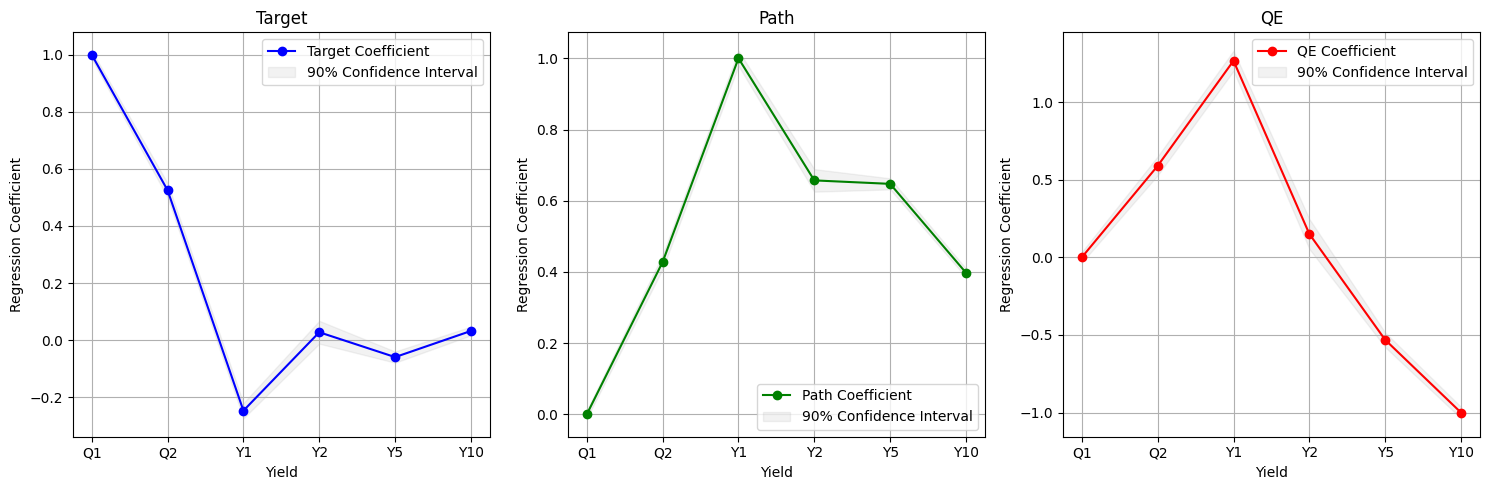

In [ ]:
terms = ['Q1', 'Q2', 'Y1', 'Y2', 'Y5', 'Y10']

plot_factor_coefficients(fomc_factors, terms, ['Target', 'Path', 'QE'])

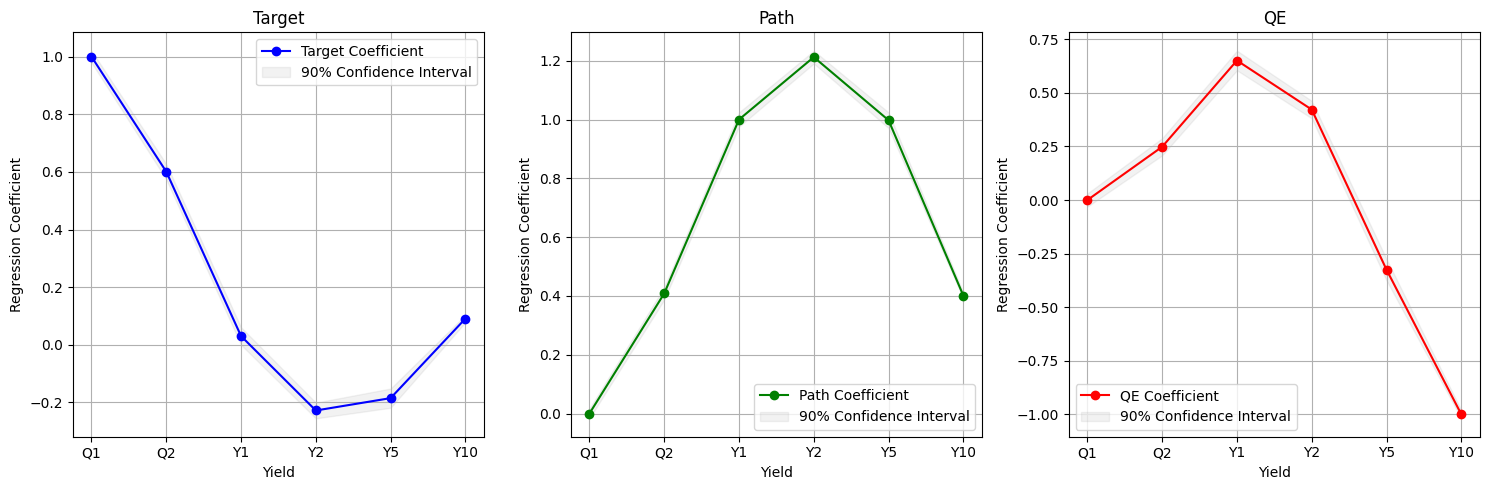

In [ ]:
plot_factor_coefficients(ecb_factors, terms, ['Target', 'Path', 'QE'])

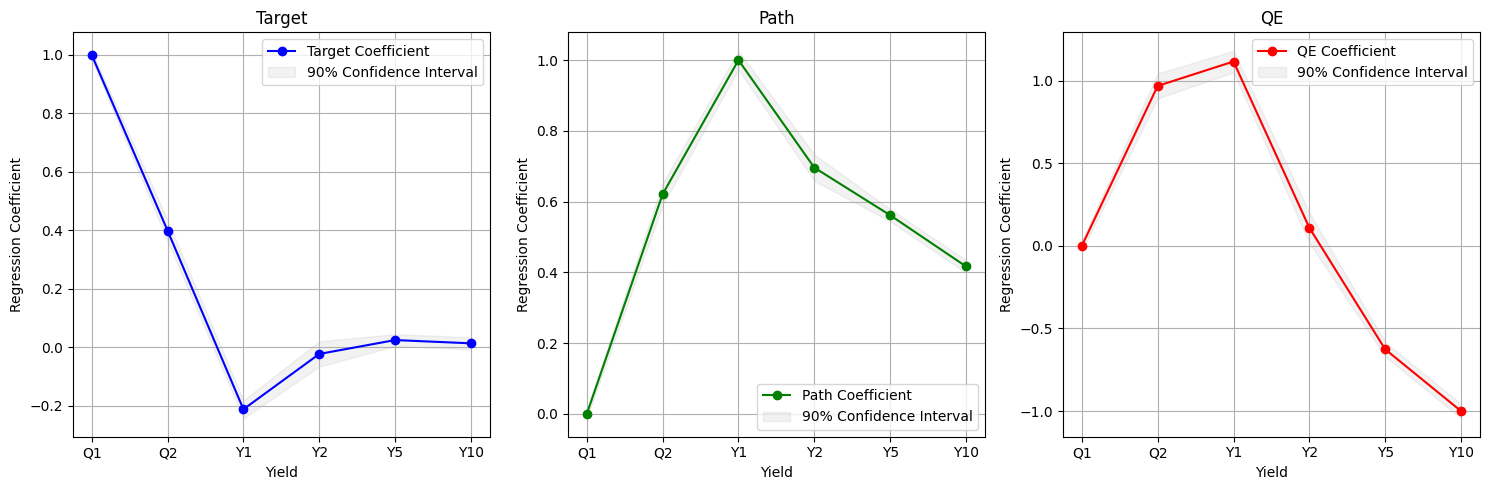

In [ ]:
plot_factor_coefficients(boe_factors, terms, ['Target', 'Path', 'QE'])

In [ ]:
fomc_factors

,Date,Q1,Q2,Y1,Y2,Y5,Y10,Target,Path,QE
0,1991-01-08,-0.12500,-0.1100,-0.0800,-0.024492,-0.053286,-0.058557,-0.110869,-0.081721,0.007980
1,1991-02-01,-0.04000,-0.0550,-0.0450,-0.016261,0.003629,0.006617,-0.031327,-0.013994,-0.020626
2,1991-02-01,-0.06000,-0.0300,-0.0300,-0.004875,-0.021771,-0.008824,-0.038000,-0.016241,-0.000985
3,1991-02-07,0.01000,-0.0050,-0.0100,-0.003248,0.000000,0.002192,0.020089,0.006846,-0.002580
4,1991-03-08,-0.06500,-0.0850,-0.0500,0.019617,-0.027666,-0.029307,-0.059889,-0.033035,0.000339
...,...,...,...,...,...,...,...,...,...,...
291,2023-06-14,0.00250,0.0750,0.1450,0.115748,0.091064,0.054933,0.020335,0.163058,0.006125
292,2023-07-26,-0.00250,0.0050,0.0075,0.004019,0.000000,0.000000,0.011788,0.015831,0.004307
293,2023-09-20,0.03250,0.0625,0.1075,0.071429,0.057770,0.036750,0.044047,0.115062,0.008971
294,2023-11-01,-0.01500,-0.0150,-0.0125,-0.015098,-0.014365,-0.008503,-0.002114,-0.008679,0.003169


In [ ]:
## Old plotting function, only regresses on one surprise at a time

def plot_factor_coefficients(df, terms, factors):

    # Lists to store regression coefficients and confidence intervals
    coef_data = {var: {'coefs': [], 'lower_cis': [], 'upper_cis': []} for var in factors}

    for term in terms:
        y = df[term]
    
    # Run separate regression for each factor
        for var in factors:
            # Create X with just one factor (plus constant)
            X = df[[var]]  
            X = sm.add_constant(X)
            
            # Fit model
            model = sm.OLS(y, X).fit()
            
            # Store results
            coef_data[var]['coefs'].append(model.params[var])
            ci = model.conf_int().loc[var]
            coef_data[var]['lower_cis'].append(ci[0])
            coef_data[var]['upper_cis'].append(ci[1])
    
    # Create the plots
    x_axis = terms
    num_plots = len(factors)
    fig, axes = plt.subplots(1, num_plots, figsize=(15, 5))  
    if num_plots == 1:
        axes = [axes]
    
    colors = {'target': 'blue', 'path': 'green', 'QE': 'red'} 

    for i, var in enumerate(factors):
      ax = axes[i]
      ax.plot(x_axis, coef_data[var]['coefs'], marker='o', linestyle='-', label=f'{var} Coefficient', color=colors.get(var, 'black')) # Set correct colors
      ax.fill_between(x_axis, coef_data[var]['lower_cis'], coef_data[var]['upper_cis'], color='gray', alpha=0.2, label = '95% Confidence Interval')
      ax.set_xlabel('Term')
      ax.set_ylabel('Coefficient Value')
      ax.set_title(var.title()) 
      ax.legend()
      ax.grid(True)
    plt.tight_layout() 
    plt.show()